# Exercise


Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

---

In [3]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
def prepare():
    df = get_store_data()
    print('Data acquired...')
    print('Converting to datetime')
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index("sale_date").sort_index()
    print('Sale date set to datetime and reindexed...')
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    df['sales_total']=df.sale_amount * df.item_price
    print('Added engineered columns...')
    print('Prepare complete')
    return df

In [20]:
def prepare2(): 
    df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
    print('Read power data from CSV...')
    print('Converting date to datetime...')
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()
    print('Dates converted and reindexed...')
    df['month'] = df.index.month
    df['year'] = df.index.year
    print('Added engineered columns...')
    print('Null value counts:')
    print(df.isnull().sum())
    print()
    print('Filling NAs...')
    #df.ffill(inplace=True)
    #df.bfill(inplace=True)
    df.fillna(0, inplace=True)
    print()
    print('Null value counts:')
    print(df.isnull().sum())
    print('Data prep complete.')
    return df

---

### Store

In [125]:
df=prepare()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete
Data acquired...
Converting to datetime
Sale date set to datetime and reindexed...
Added engineered columns...
Prepare complete


In [127]:
df.head()

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,26.0,211817,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,27.0,832657,45,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,54.0,213643,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,7,15000 San Pedro Ave,San Antonio,8,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,35.0,215469,11,Mueller,12,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,8,735 SW Military Dr,San Antonio,9,TX,78221,1,Tuesday,294.00


In [128]:
df.to_csv('sales_prepared.csv')

In [129]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape: (913000, 19)


In [130]:
#Daily sales totals
day = df.resample('D').sum()


In [131]:
day.head()

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,227793500,13696.0,227794000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,500,73844.01
2013-01-02 00:00:00+00:00,227794000,13678.0,227794500,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,500,73570.58
2013-01-03 00:00:00+00:00,227794500,14488.0,227795000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,500,78169.48
2013-01-04 00:00:00+00:00,227795000,15677.0,227795500,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,500,84467.73
2013-01-05 00:00:00+00:00,227795500,16237.0,227796000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,500,87621.85


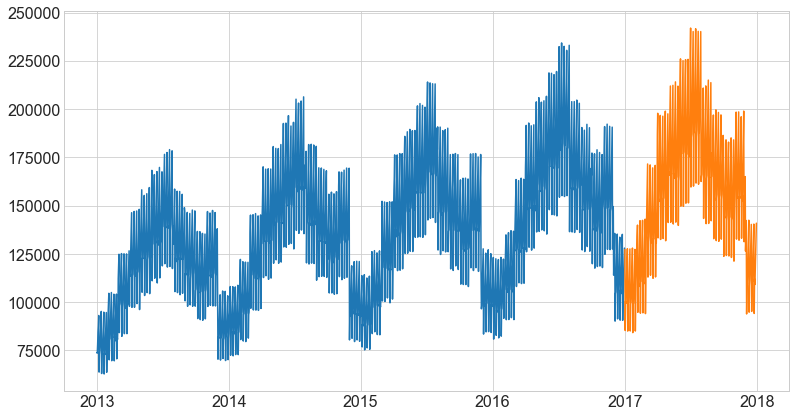

In [132]:
train = day[:'2016'] # includes 2016
test = day['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [133]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

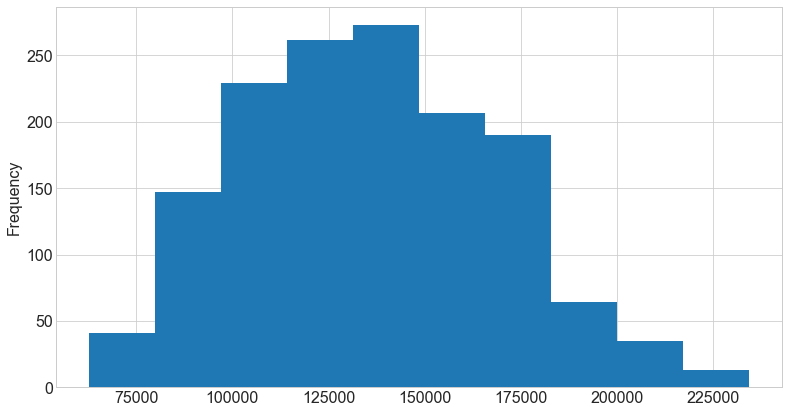

In [134]:
y.plot.hist()


[Text(0.5, 1.0, 'Average Daily Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average Daily Sales ($) ')]

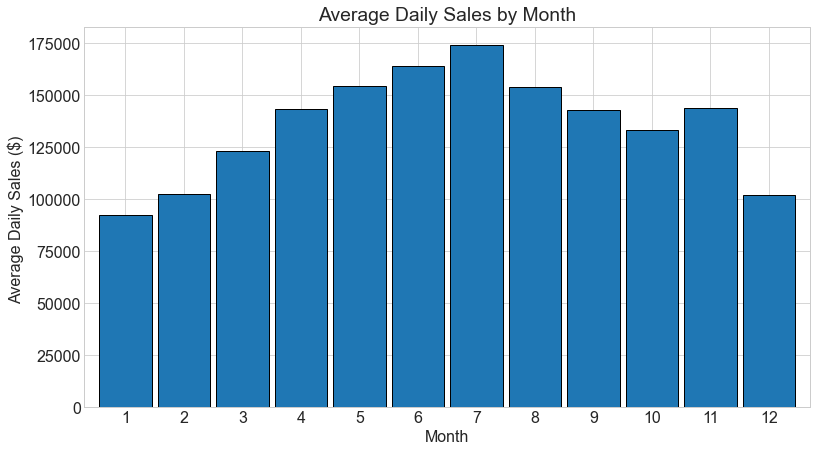

In [135]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Daily Sales by Month', xlabel='Month', ylabel='Average Daily Sales ($) ')

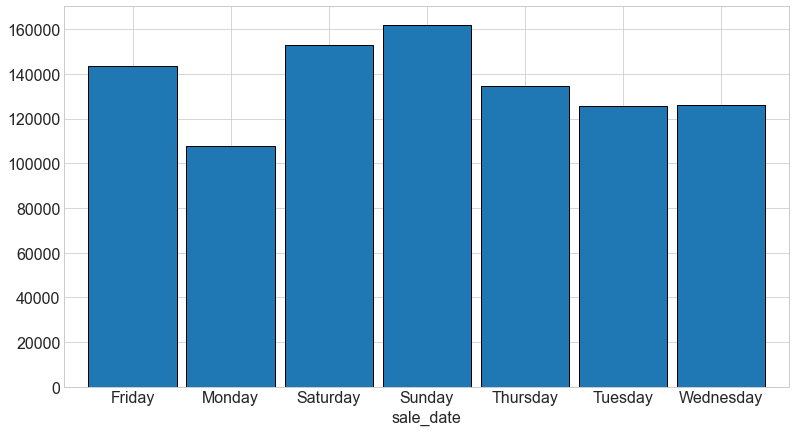

In [138]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Daily Sales by Weekday', xlabel='Weekday', ylabel='Sales($))');


<AxesSubplot:xlabel='month', ylabel='sales_total'>

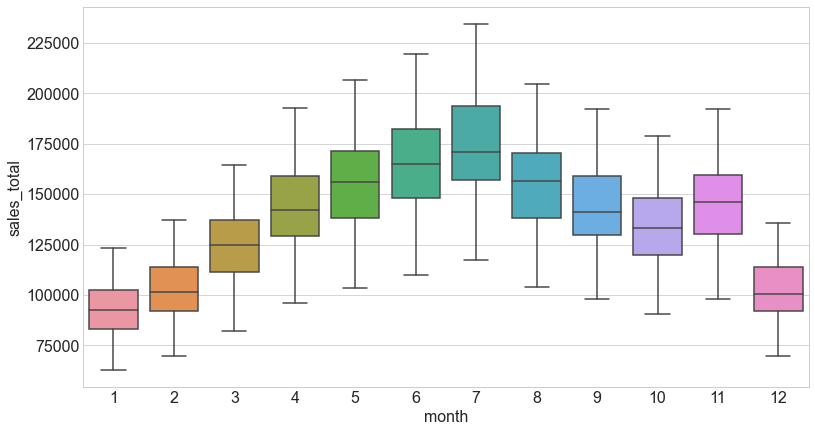

In [146]:
sns.boxplot(data = train, x = 'month', y = 'sales_total')

In [143]:
train['month']=train.index.month

In [149]:
train['weekday']=train.index.day_name()

In [148]:
train.sample(25)

,Unnamed: 0_x,sale_amount,sale_id,Unnamed: 0_y,item_id,item_price,item_upc12,item_upc14,Unnamed: 0,store_id,store_zipcode,month,sales_total,weekdayday
sale_date,,,,,,,,,,,,,,
2016-05-20 00:00:00+00:00,228411000,34089.0,228411500,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,5,183275.68,Friday
2016-01-26 00:00:00+00:00,228353500,17794.0,228354000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,1,96033.11,Tuesday
2013-12-03 00:00:00+00:00,227961500,15226.0,227962000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,12,81830.55,Tuesday
2014-07-04 00:00:00+00:00,228068000,33961.0,228068500,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,7,182005.62,Friday
2013-08-01 00:00:00+00:00,227899500,24052.0,227900000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,8,130101.56,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-09 00:00:00+00:00,228116500,24245.0,228117000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,10,130519.31,Thursday
2016-02-04 00:00:00+00:00,228358000,20981.0,228358500,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,2,112698.38,Thursday
2014-11-04 00:00:00+00:00,228129500,24251.0,228130000,12250,12750,2580.2,119234392245520,119234392245520,2250,2750,39112400,11,130423.45,Tuesday


<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

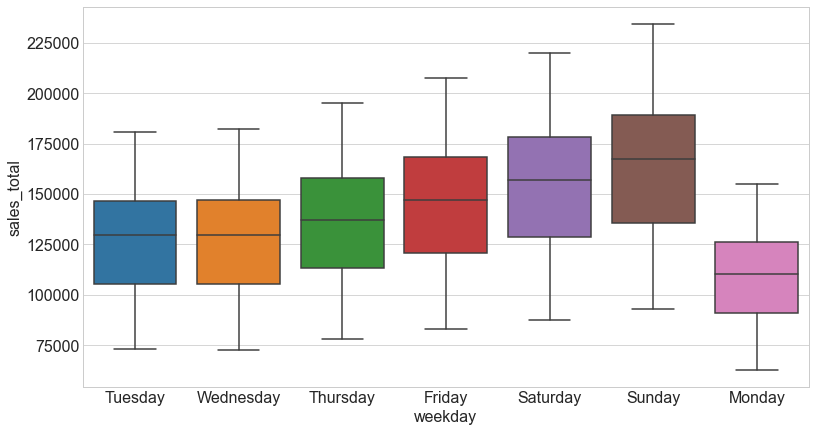

In [150]:
sns.boxplot(data = train, x = 'weekday', y = 'sales_total')

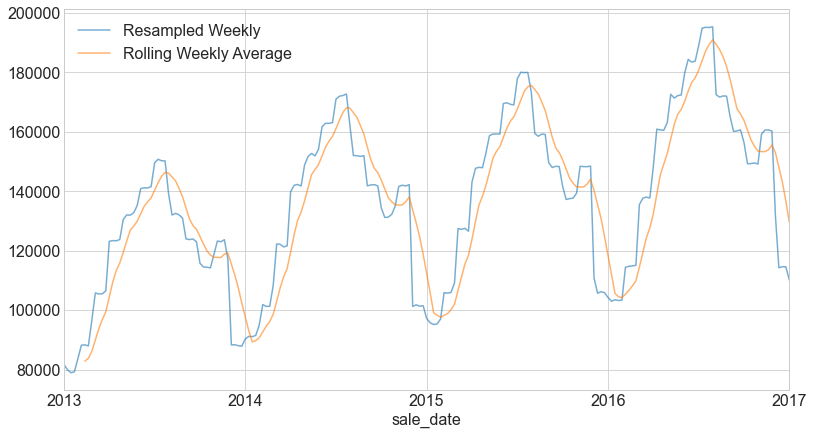

In [159]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

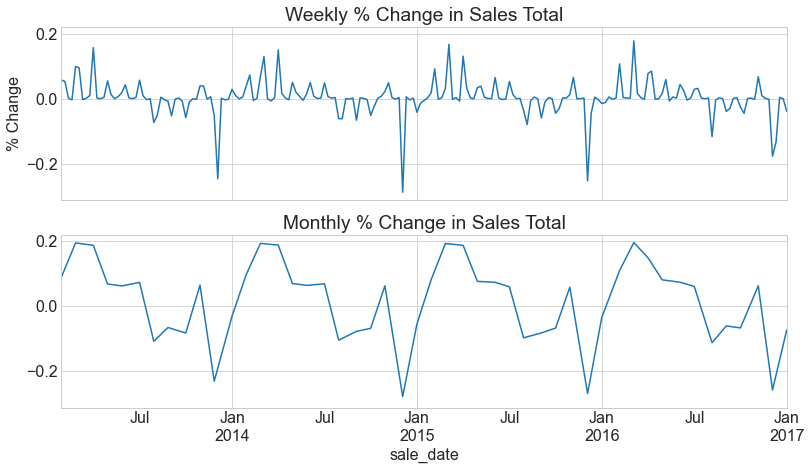

In [160]:
#Ravinder plot from review

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())


In [151]:
train.isna().sum()

Unnamed: 0_x     0
sale_amount      0
sale_id          0
Unnamed: 0_y     0
item_id          0
item_price       0
item_upc12       0
item_upc14       0
Unnamed: 0       0
store_id         0
store_zipcode    0
month            0
sales_total      0
weekdayday       0
weekday          0
dtype: int64

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

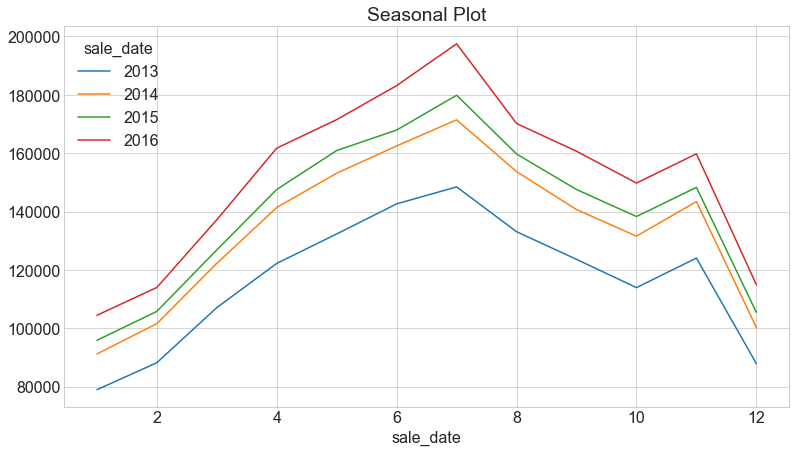

In [152]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


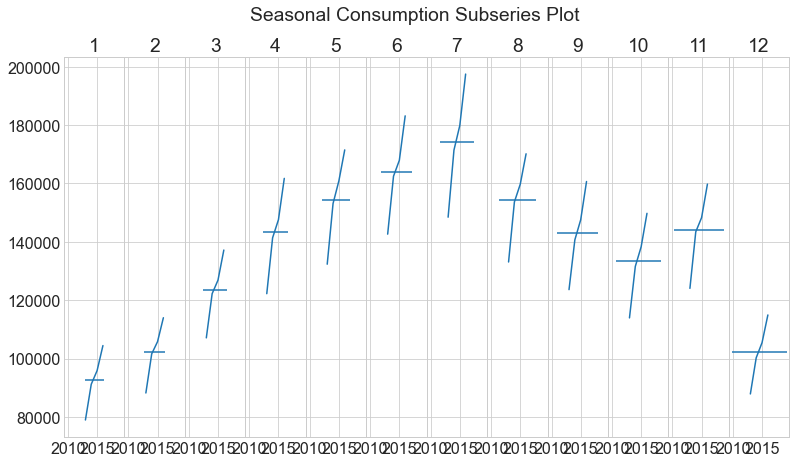

In [153]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Consumption Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

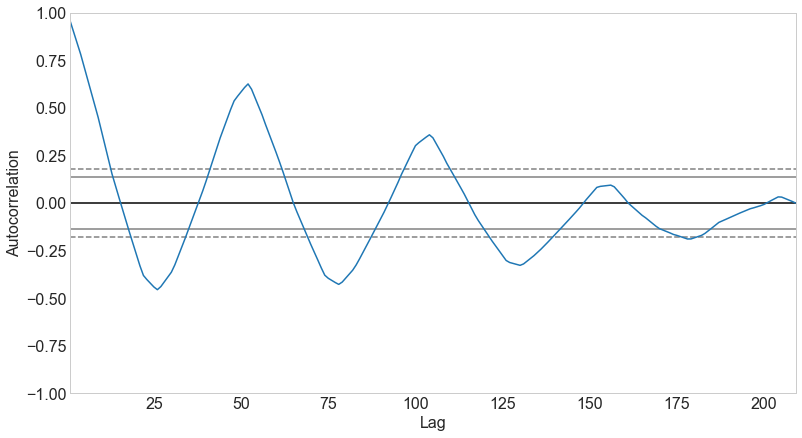

In [154]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())


In [156]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38717.394736,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-39612.878742,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-39952.141819,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-40129.678568,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-38676.346096,NaN


<AxesSubplot:xlabel='sale_date'>

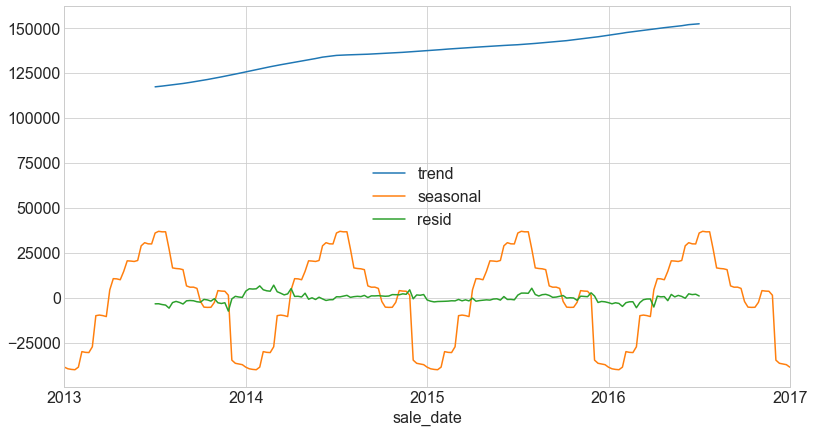

In [157]:
decomposition.iloc[:, 1:].plot()


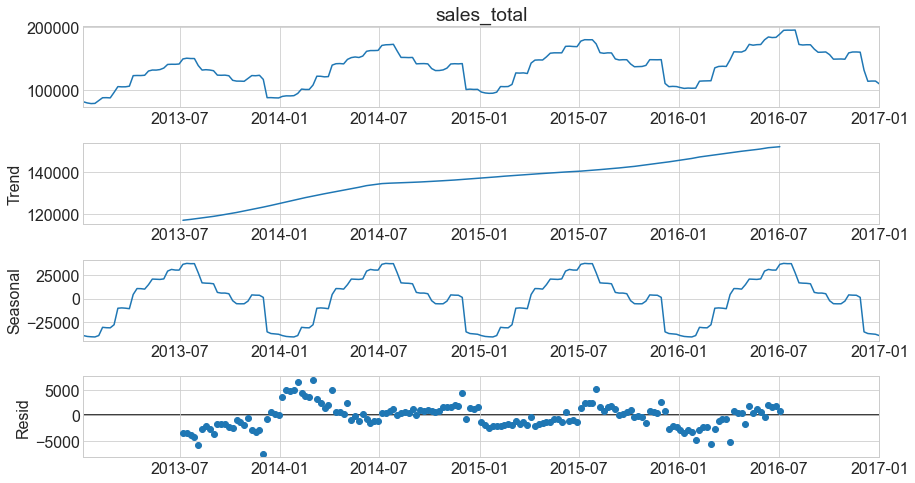

In [158]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

---

## OPS

In [163]:
df=prepare2()

Read power data from CSV...
Converting date to datetime...
Dates converted and reindexed...
Added engineered columns...
Null value counts:
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

Filling NAs...

Null value counts:
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64
Data prep complete.


In [164]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [165]:
df.Wind.value_counts()

0.000      1463
229.770       2
29.274        2
31.469        2
34.973        2
           ... 
329.651       1
263.516       1
383.741       1
118.332       1
153.288       1
Name: Wind, Length: 2914, dtype: int64

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>, <AxesSubplot:>]],
      dtype=object)

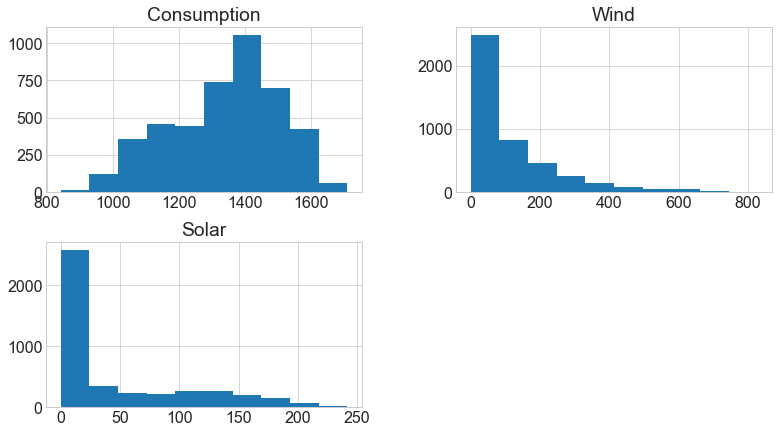

In [166]:
df[['Consumption', 'Wind', 'Solar']].hist()

In [167]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)


Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


<AxesSubplot:xlabel='Date'>

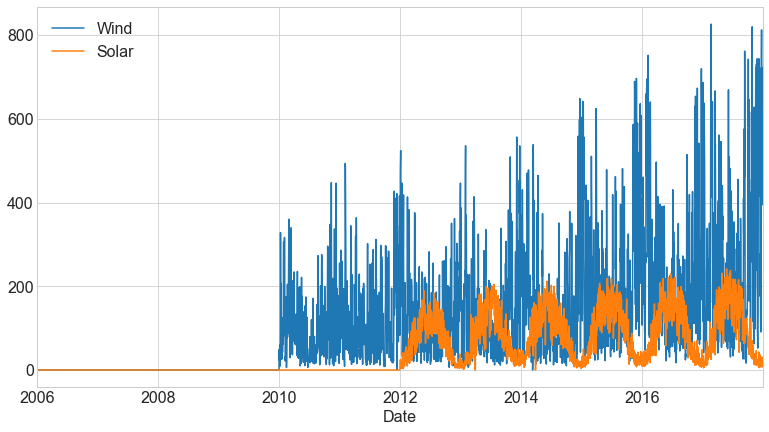

In [168]:
df[['Wind', 'Solar']].plot()

<AxesSubplot:xlabel='Date'>

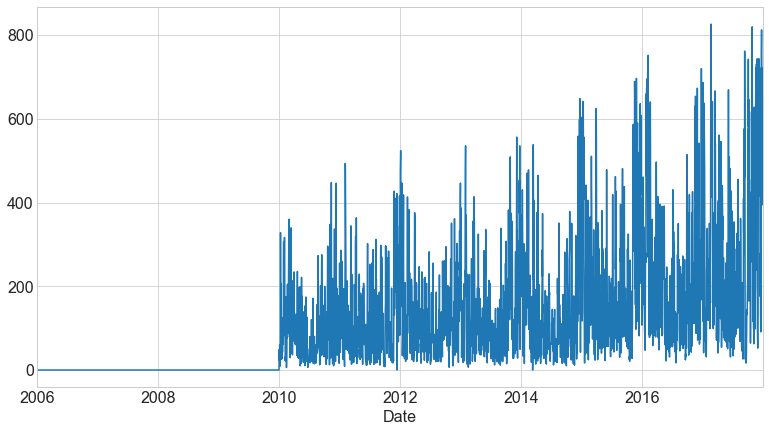

In [169]:
df.Wind.plot()

<AxesSubplot:xlabel='Date'>

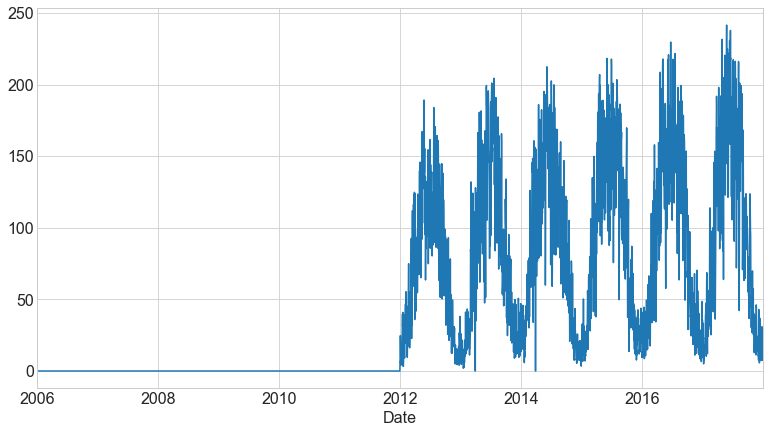

In [170]:
df.Solar.plot()

<AxesSubplot:xlabel='Date'>

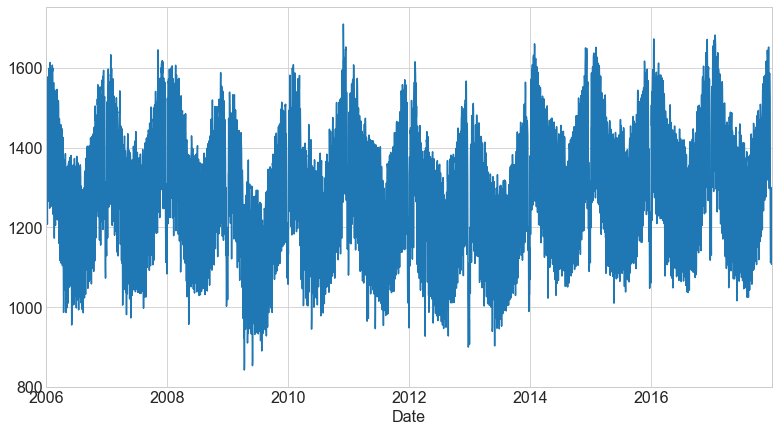

In [171]:
df.Consumption.plot()

In [172]:
#Split Data

train = df[:'2016'] # includes 2016
test = df['2017']


In [173]:
test

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,1,2017
2017-01-02,1441.05200,295.099,12.479,307.578,1,2017
2017-01-03,1529.99000,666.173,9.351,675.524,1,2017
2017-01-04,1553.08300,686.578,12.814,699.392,1,2017
2017-01-05,1547.23800,261.758,20.797,282.555,1,2017
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


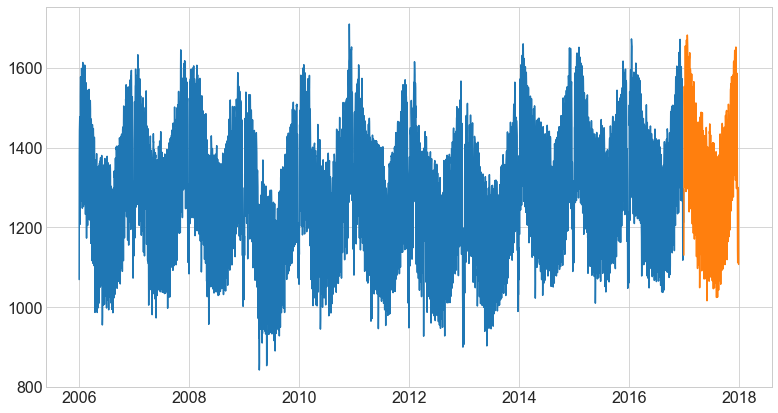

In [174]:

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [175]:
y=train.Consumption

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

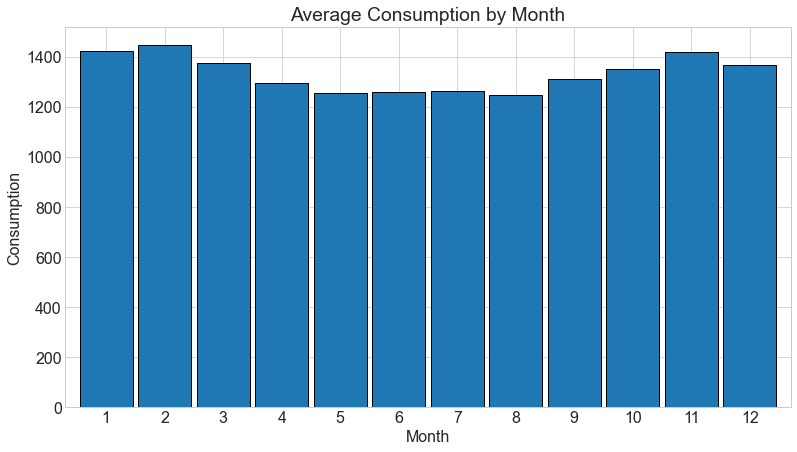

In [176]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

In [177]:
y2=train.Solar
y3=train.Wind

[Text(0.5, 1.0, 'Average Solar by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Solar')]

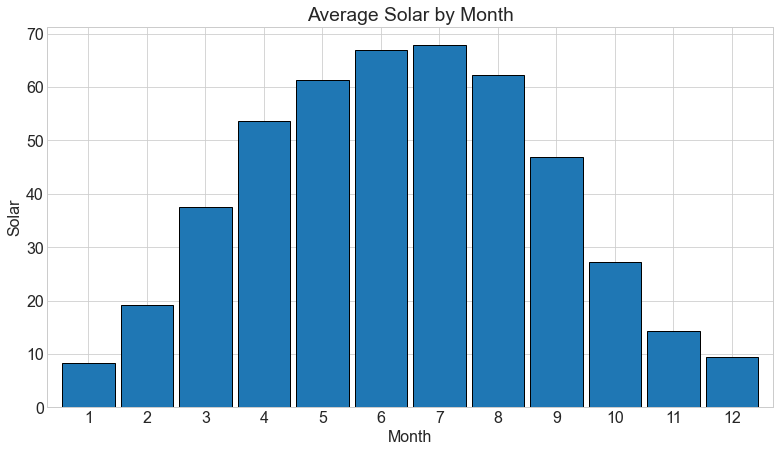

In [178]:
ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Solar by Month', xlabel='Month', ylabel='Solar')

[Text(0.5, 1.0, 'Average Wind by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Wind')]

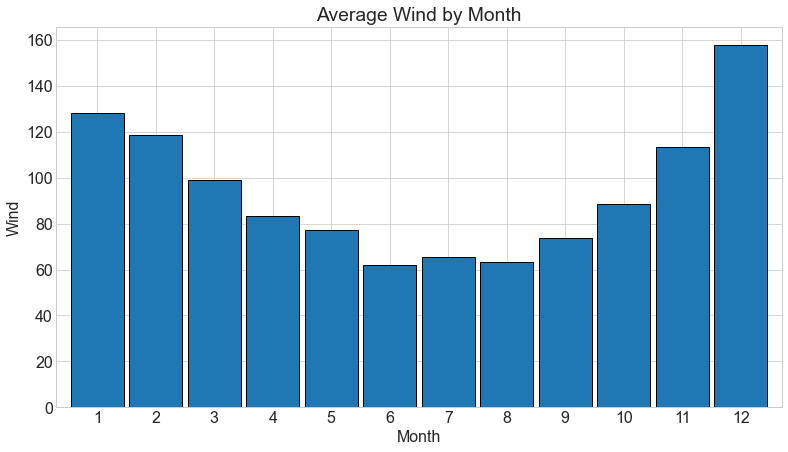

In [179]:
ax = y3.groupby(y3.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind by Month', xlabel='Month', ylabel='Wind')

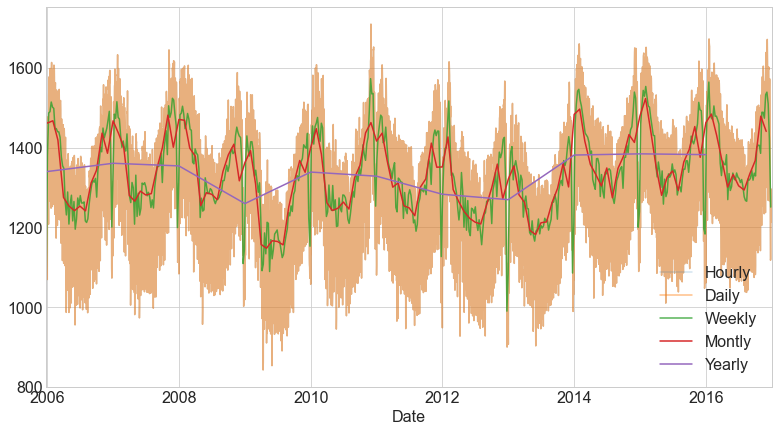

In [180]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [181]:
y2.head()

Date
2006-01-01    0.0
2006-01-02    0.0
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
Name: Solar, dtype: float64

In [182]:
train.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [183]:
y2.sample(25)

Date
2016-11-20     46.876
2015-04-15    193.770
2007-11-26      0.000
2009-09-16      0.000
2007-08-13      0.000
2006-02-20      0.000
2009-02-22      0.000
2012-10-17     74.323
2014-10-27     57.641
2016-03-17    157.923
2016-12-14     16.451
2015-09-11    138.019
2015-08-19    104.526
2016-03-08     75.801
2016-05-29    124.929
2011-07-16      0.000
2008-12-23      0.000
2009-05-28      0.000
2014-05-27     70.470
2011-05-06      0.000
2016-10-31     62.064
2011-07-06      0.000
2012-08-02    134.865
2011-05-03      0.000
2009-06-06      0.000
Name: Solar, dtype: float64

In [184]:
y2.sample(25)

Date
2015-09-16     70.325
2008-06-02      0.000
2007-01-11      0.000
2011-12-26      0.000
2012-02-09     19.042
2008-12-25      0.000
2007-09-18      0.000
2010-08-24      0.000
2015-01-02      7.758
2012-04-22     87.018
2008-09-22      0.000
2006-05-22      0.000
2016-03-22     69.934
2008-02-04      0.000
2016-01-09     23.891
2011-06-29      0.000
2011-01-14      0.000
2010-08-04      0.000
2008-03-06      0.000
2009-07-21      0.000
2013-06-21    150.829
2012-09-21    108.905
2008-02-22      0.000
2016-02-17     44.222
2014-02-25    104.440
Name: Solar, dtype: float64

In [185]:
y2.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='Date', length=4018)

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

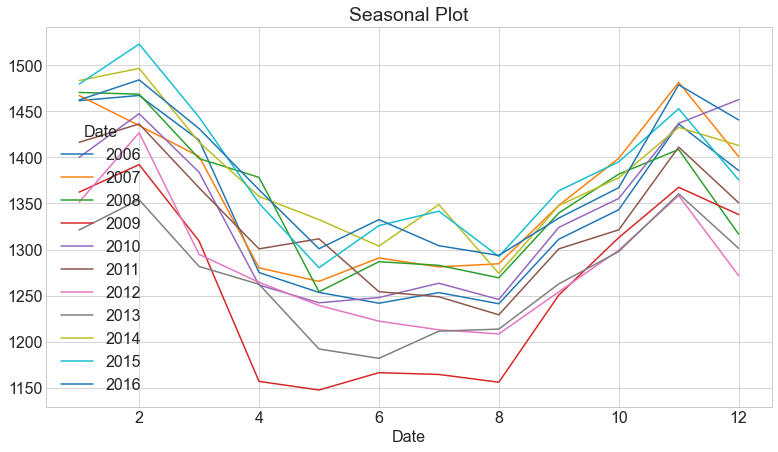

In [186]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Solar Seasonal Plot'}, xlabel='Date'>

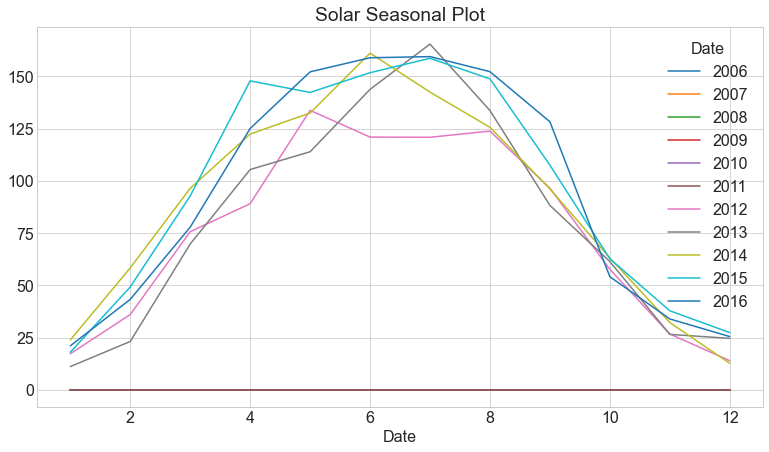

In [187]:
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Solar Seasonal Plot')

<AxesSubplot:title={'center':'Wind Seasonal Plot'}, xlabel='Date'>

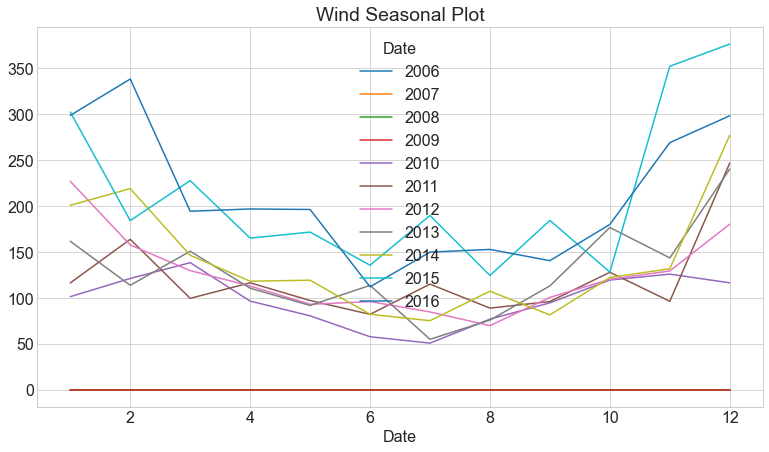

In [188]:
y3.groupby([y3.index.year, y3.index.month]).mean().unstack(0).plot(title='Wind Seasonal Plot')


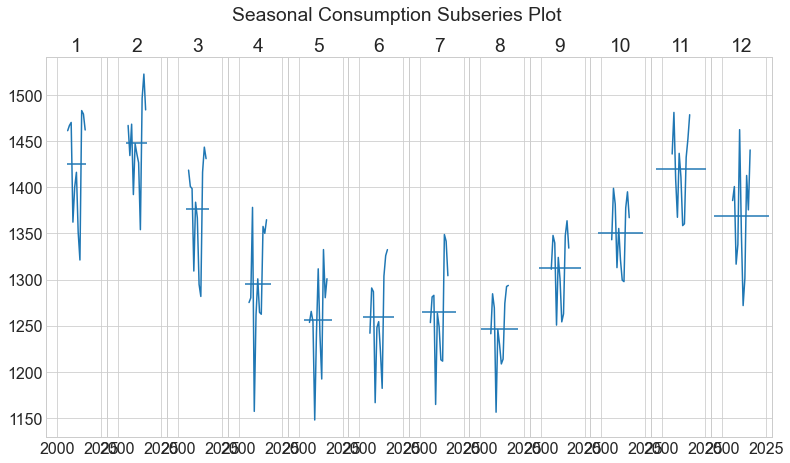

In [189]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Consumption Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

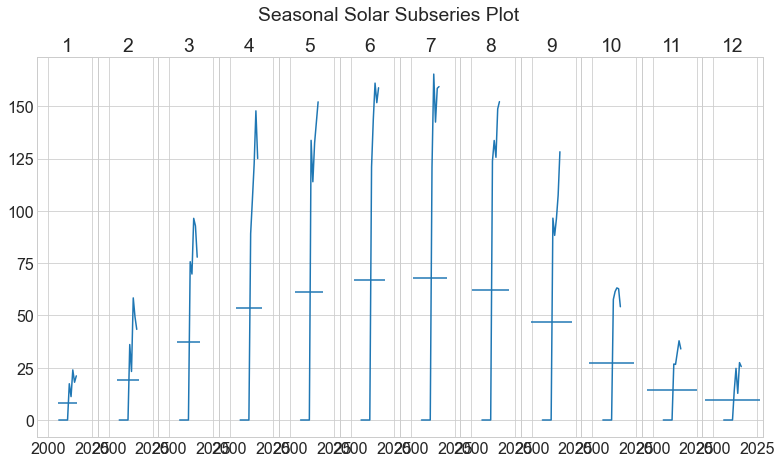

In [190]:
table = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Solar Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

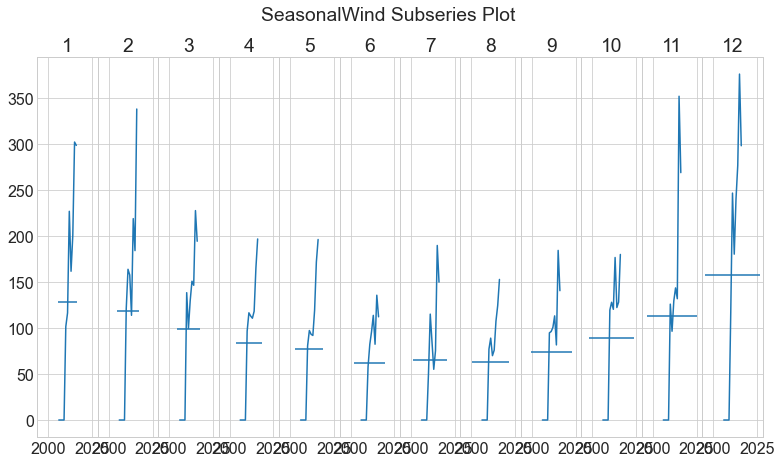

In [191]:
table = y3.groupby([y3.index.year, y3.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('SeasonalWind Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

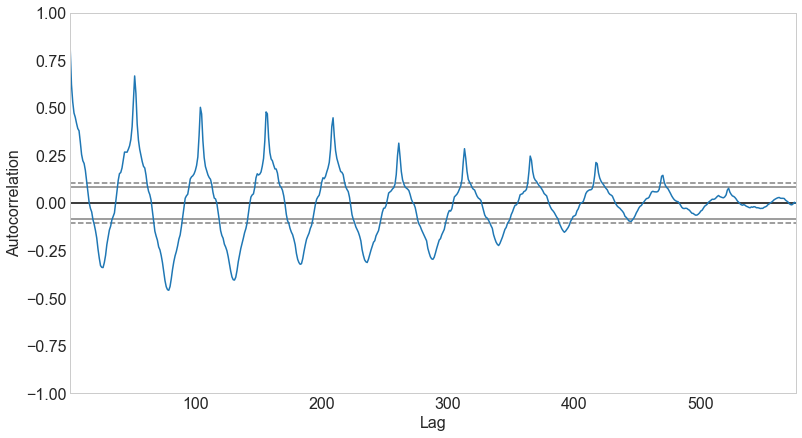

In [192]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

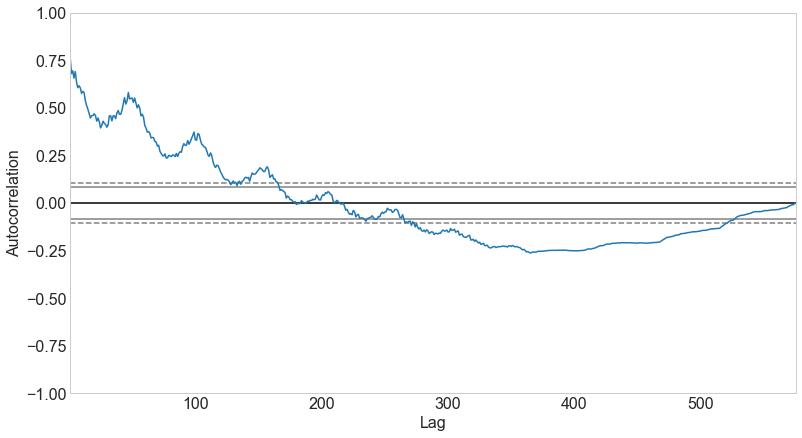

In [193]:
pd.plotting.autocorrelation_plot(train.Wind.resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

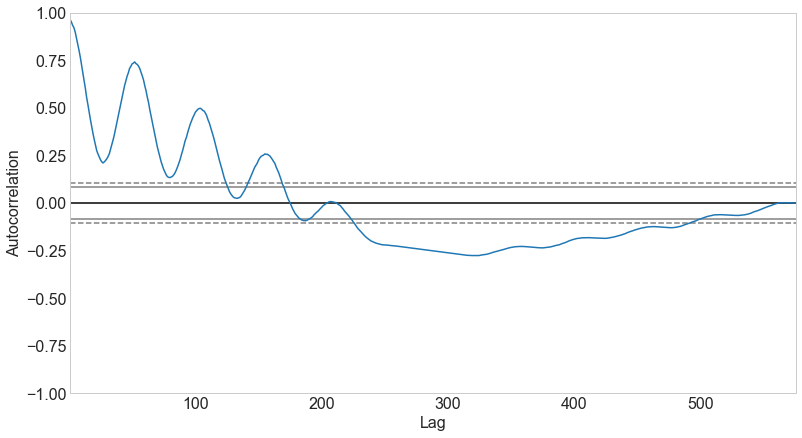

In [194]:
pd.plotting.autocorrelation_plot(train.Solar.resample('W').mean())


In [195]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-33.536583,NaN
2006-01-08,1381.300143,NaN,-151.128130,NaN
2006-01-15,1486.730286,NaN,-23.125938,NaN
2006-01-22,1490.031143,NaN,97.415793,NaN
2006-01-29,1514.176857,NaN,125.755815,NaN


<AxesSubplot:xlabel='Date'>

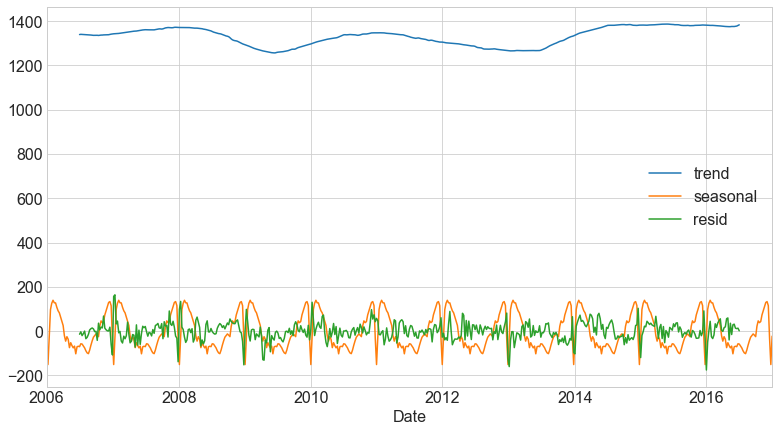

In [196]:
decomposition.iloc[:, 1:].plot()


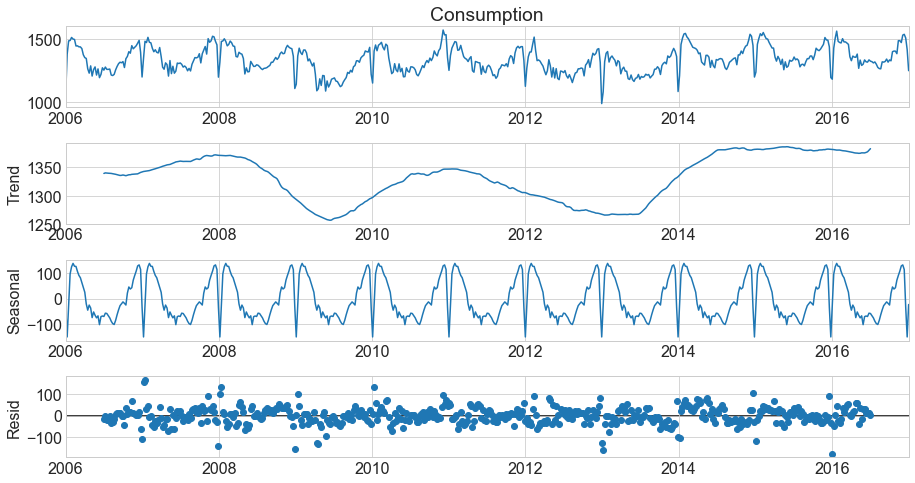

In [197]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [198]:
y2=train[train.Wind>0]


In [199]:
y2.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.372,48.709,0.0,0.0,1,2010
2010-01-02,1161.042,24.628,0.0,0.0,1,2010
2010-01-03,1132.069,22.963,0.0,0.0,1,2010
2010-01-04,1346.250,59.318,0.0,0.0,1,2010
2010-01-05,1457.374,41.624,0.0,0.0,1,2010


In [200]:

y2 = y2.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-33.536583,NaN
2006-01-08,1381.300143,NaN,-151.128130,NaN
2006-01-15,1486.730286,NaN,-23.125938,NaN
2006-01-22,1490.031143,NaN,97.415793,NaN
2006-01-29,1514.176857,NaN,125.755815,NaN


<AxesSubplot:xlabel='Date'>

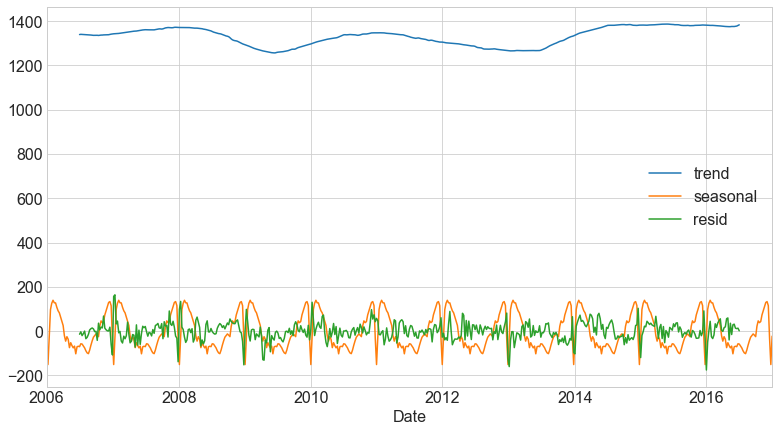

In [201]:
decomposition.iloc[:, 1:].plot()


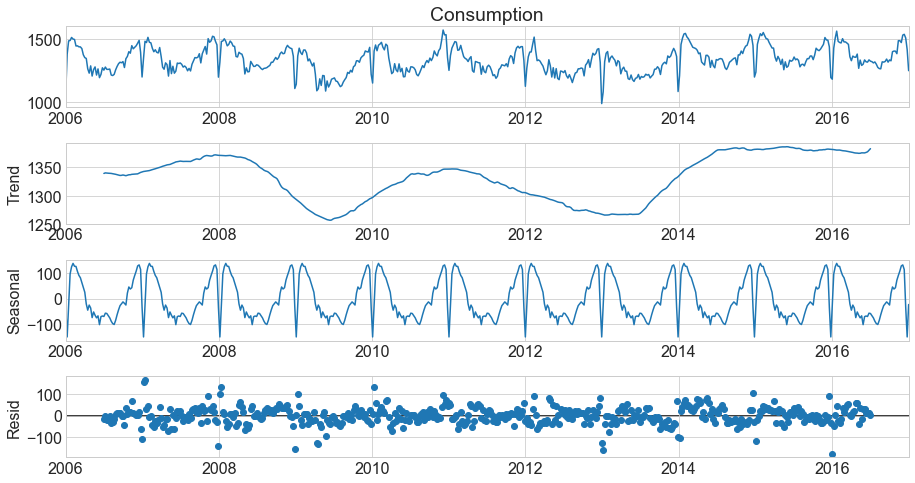

In [202]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [203]:
y = train.Solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,0.0,NaN,-31.489949,NaN
2006-01-08,0.0,NaN,-29.068403,NaN
2006-01-15,0.0,NaN,-30.702312,NaN
2006-01-22,0.0,NaN,-28.889866,NaN
2006-01-29,0.0,NaN,-30.789656,NaN


<AxesSubplot:xlabel='Date'>

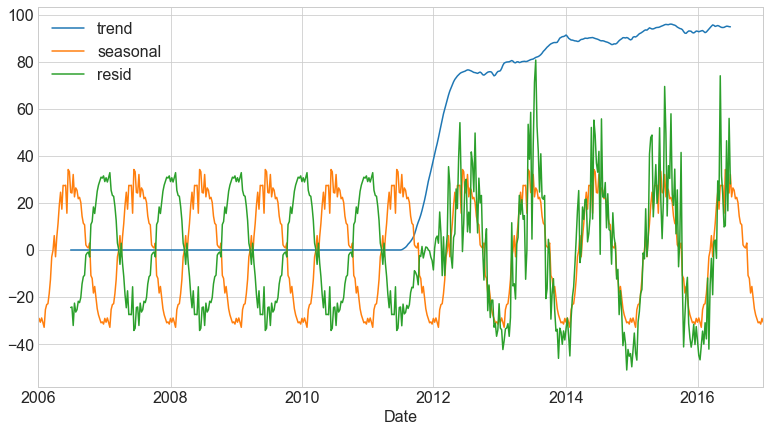

In [204]:
decomposition.iloc[:, 1:].plot()


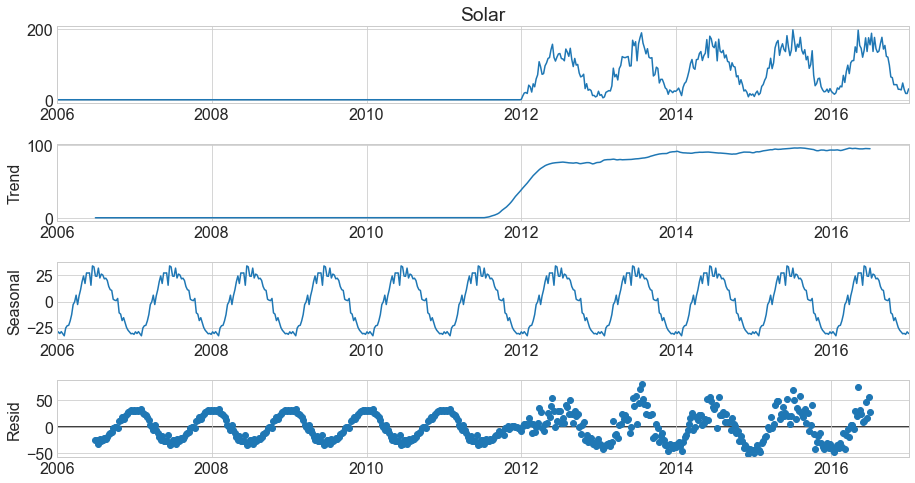

In [205]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

<AxesSubplot:xlabel='month', ylabel='Consumption'>

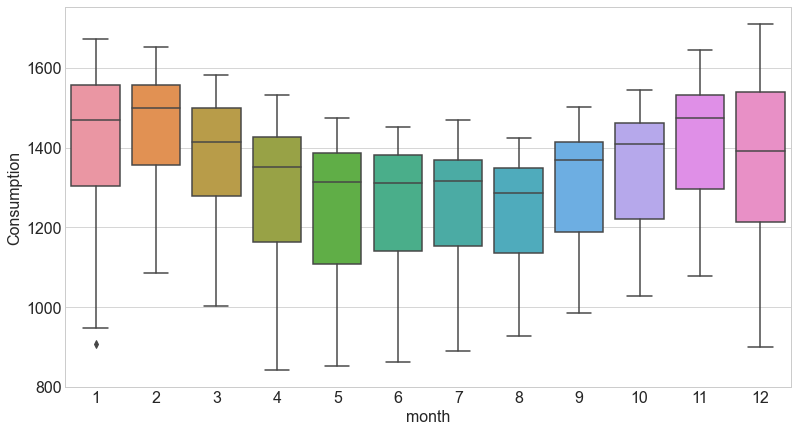

In [206]:
sns.boxplot(data = train, x = 'month', y = 'Consumption')

In [207]:
train.Wind

Date
2006-01-01      0.000
2006-01-02      0.000
2006-01-03      0.000
2006-01-04      0.000
2006-01-05      0.000
               ...   
2016-12-27    640.895
2016-12-28    214.990
2016-12-29    167.698
2016-12-30    239.257
2016-12-31    315.063
Name: Wind, Length: 4018, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Wind'>

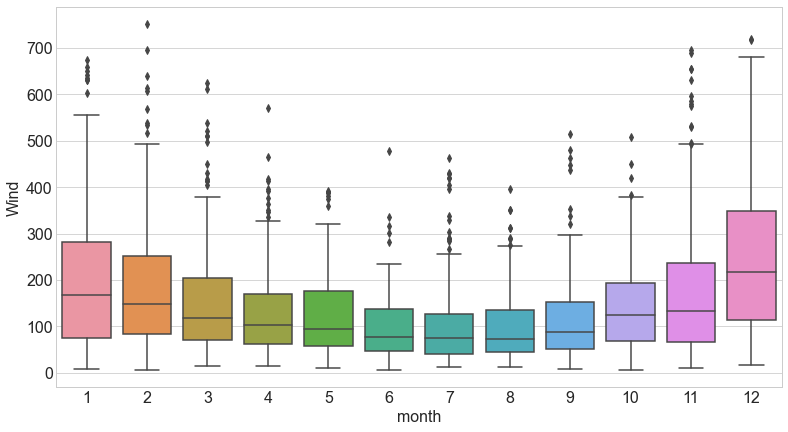

In [208]:
sns.boxplot(data = train[train.Wind>0], x = 'month', y = 'Wind')

<AxesSubplot:xlabel='month', ylabel='Solar'>

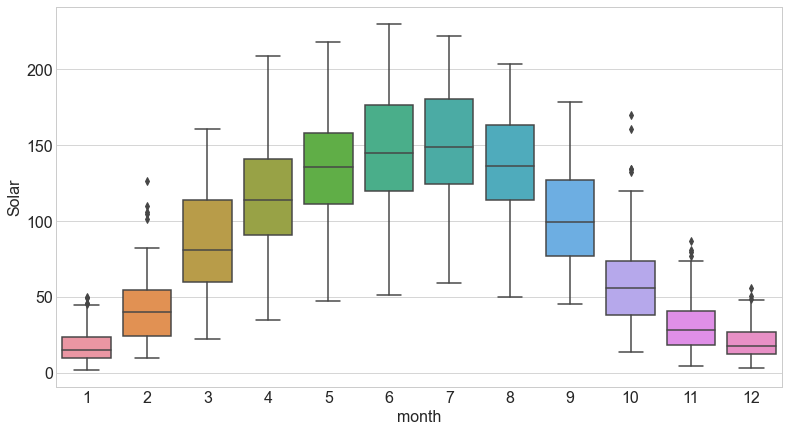

In [209]:
sns.boxplot(data = train[train.Solar>0], x = 'month', y = 'Solar')

In [210]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [212]:
train.head

<bound method NDFrame.head of             Consumption     Wind   Solar  Wind+Solar  month  year
Date                                                             
2006-01-01     1069.184    0.000   0.000       0.000      1  2006
2006-01-02     1380.521    0.000   0.000       0.000      1  2006
2006-01-03     1442.533    0.000   0.000       0.000      1  2006
2006-01-04     1457.217    0.000   0.000       0.000      1  2006
2006-01-05     1477.131    0.000   0.000       0.000      1  2006
...                 ...      ...     ...         ...    ...   ...
2016-12-27     1289.324  640.895  23.448     664.343     12  2016
2016-12-28     1294.881  214.990  19.450     234.440     12  2016
2016-12-29     1295.897  167.698  42.910     210.608     12  2016
2016-12-30     1291.044  239.257  48.546     287.803     12  2016
2016-12-31     1212.568  315.063  34.580     349.643     12  2016

[4018 rows x 6 columns]>

Ravinder feature enginneering to add conventional power and look at relative contribution

In [215]:
sources = train[['Consumption', 'Wind', 'Solar']]
sources['conventional'] = sources.Consumption - sources.Wind - sources.Solar


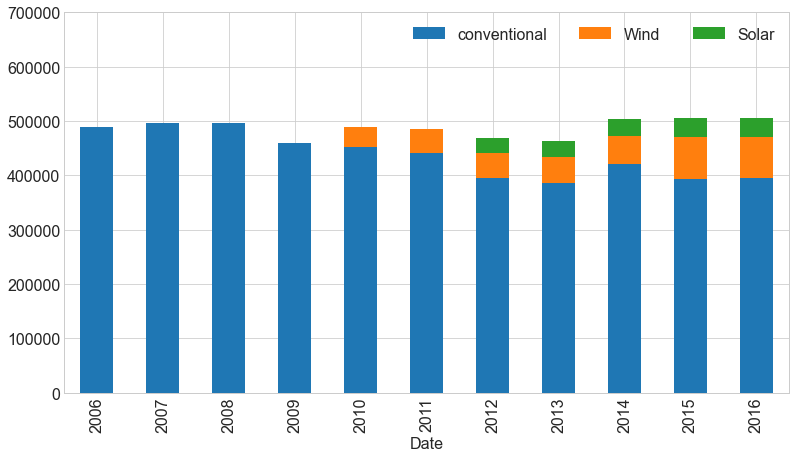

In [216]:
# lets plot the three power sources as stacked bar chart:

ax = sources[['conventional', 'Wind', 'Solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);